In [1]:
from spacerocks import SpaceRock, Units

from astroquery.jplhorizons import Horizons

from astropy.time import Time
from astropy import units as u
from astropy.coordinates import SkyCoord

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
units = Units()
units.timescale = 'tdb' # JPL gives elements in TDB. This actually matters for precise ephemerides.
units.current()

Quantity             Unit           
---------------------------------------
distance             AU             
angle                deg            
timescale            tdb            
timeformat           None           
speed                AU / d         
size                 km             
density              g / cm3        
mass                 kg             
ra                   deg            
dec                  deg            
rotation_curves      False          


In [3]:
rock = SpaceRock.from_horizons(name='Valjean')

In [4]:
rock.__dict__

{'frame': 'eclipJ2000',
 'origin': 'sun',
 'mu': <Quantity 0.00029591 AU3 rad2 / d2>,
 '_position': <spacerocks.vector.Vector at 0x7fde9265a6d0>,
 '_velocity': <spacerocks.vector.Vector at 0x7fde9265a580>,
 'epoch': <Time object: scale='tdb' format='datetime' value=[datetime.datetime(2022, 4, 14, 0, 0)]>,
 'name': array(['Valjean'], dtype=object),
 '_H': array([14.98]),
 'G': array([0.15])}

In [5]:
rock.a

<Distance [4.67581307e-310] AU>

In [6]:
rock.inc.deg

array([6.39979683])

In [4]:
startdate = Time('2000-01-01', scale='utc', format='iso')
testdates = Time(np.arange(startdate.jd, startdate.jd + 50 * 365.25, 30), scale='utc', format='jd')

In [5]:
units.timescale = 'utc'

In [6]:
%%time
prop, planets, sim = rock.propagate(epochs=testdates.jd, model=3, units=units, gr=False)

/home/kevin/anaconda3/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 280 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/kevin/anaconda3/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 280 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/kevin/anaconda3/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 7560 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


CPU times: user 11.4 s, sys: 207 ms, total: 11.6 s
Wall time: 11.6 s


In [15]:
prop.a.au[:10]

array([6.94594930e-310, 2.21910279e+000, 2.21918981e+000, 2.21936042e+000,
       2.21962261e+000, 2.21998703e+000, 2.22046585e+000, 2.22107110e+000,
       2.22181419e+000, 2.22270375e+000])

In [16]:
prop.e

array([6.94594930e-310, 1.90667106e-001, 1.90543826e-001, 1.90369974e-001,
       1.90155527e-001, 1.89914536e-001, 1.89665816e-001, 1.89433743e-001,
       1.89248020e-001, 1.89142300e-001, 1.89151009e-001, 1.89303221e-001,
       1.89613211e-001, 1.90066584e-001, 1.90605042e-001, 1.91117390e-001,
       1.91448390e-001, 1.91436325e-001, 1.90976875e-001, 1.90086785e-001,
       1.88925507e-001, 1.87747686e-001, 1.86811298e-001, 1.86294897e-001,
       1.86262302e-001, 1.86677936e-001, 1.87446050e-001, 1.88450150e-001,
       1.89579272e-001, 1.90740184e-001, 1.91860823e-001, 1.92888819e-001,
       1.93787750e-001, 1.94533640e-001, 1.95111749e-001, 1.95513984e-001,
       1.95737002e-001, 1.95780906e-001, 1.95648346e-001, 1.95344334e-001,
       1.94876478e-001, 1.94255113e-001, 1.93494599e-001, 1.92614671e-001,
       1.91641884e-001, 1.90611872e-001, 1.89572012e-001, 1.88584067e-001,
       1.87726758e-001, 1.87096907e-001, 1.86806393e-001, 1.86972624e-001,
       1.87698447e-001, 1

In [7]:
%%time
gr_prop, planets, sim = rock.propagate(epochs=testdates.jd, model=3, units=units, gr=True)

CPU times: user 1min 55s, sys: 0 ns, total: 1min 55s
Wall time: 1min 55s


In [7]:
#gr_obs = gr_prop.observe(obscode='W84')
obs = prop.observe(obscode='W84')

In [8]:
rock_id = 'Valjean'
ephem_Horizons = Horizons(id=rock_id, location='W84',
                          epochs={'start':testdates[0].iso, 
                                  'stop':testdates[-1].iso, 
                                  'step':'30d'}).ephemerides()

/home/kevin/anaconda3/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


In [9]:
pos_Horizons = SkyCoord(ephem_Horizons['RA'], ephem_Horizons['DEC'], frame='icrs', unit=(u.deg, u.deg))
pos_pred = SkyCoord(obs.ra.deg, obs.dec.deg, frame='icrs', unit=(u.deg, u.deg))
sep = pos_pred.separation(pos_Horizons)
#gr_pos_pred = SkyCoord(gr_obs.ra.deg, gr_obs.dec.deg, frame='icrs', unit=(u.deg, u.deg))
#gr_sep = gr_pos_pred.separation(pos_Horizons)

/home/kevin/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:486: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/kevin/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in arcsin
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


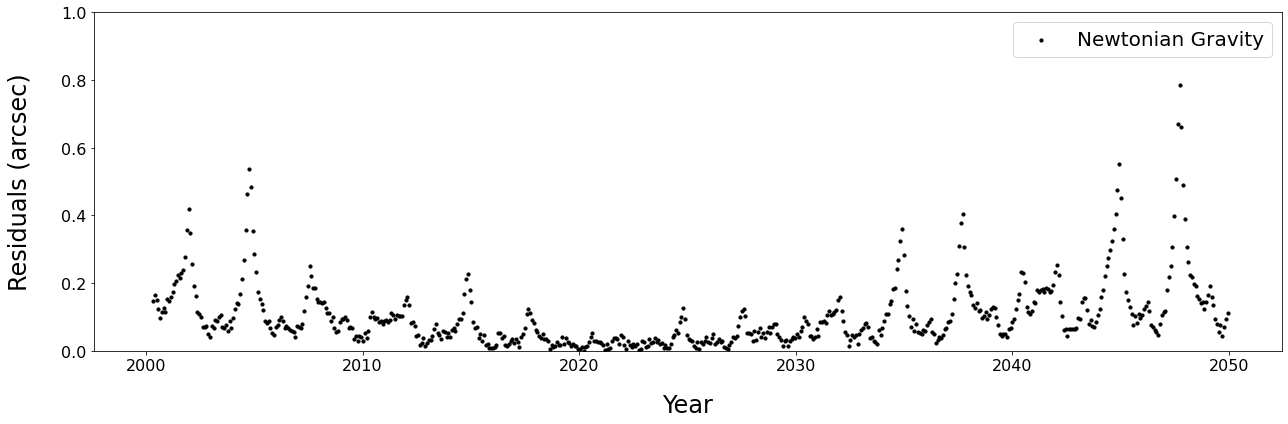

In [12]:
fig, ax = plt.subplots(figsize=(18, 6))

ax.scatter(prop.epoch.decimalyear, sep.arcsec, color='black', s=10, label='Newtonian Gravity')
#ax.scatter(gr_prop.epoch.decimalyear, gr_sep.arcsec, color='red', s=10, label='General Relativity')

ax.tick_params(labelsize=16)
ax.set_xlabel('Year', fontsize=24, labelpad=20)
ax.set_ylabel('Residuals (arcsec)', fontsize=24, labelpad=30)
ax.set_ylim(bottom=0, top=1)
ax.legend(fontsize=20)
fig.tight_layout()
#fig.savefig('/home/kevin/Desktop/Valjean.pdf')